# 네이버 쇼핑 리뷰 분석

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth",100) # 컬럼의 너비를 조정해서 긴 리뷰를 볼 수 있게 조정

In [11]:
train = pd.read_csv('./data/naver_shopping.txt', delimiter="\t", header=None)


In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
display(train.head())

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       200000 non-null  int64 
 1   1       200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [15]:
train.shape

(200000, 2)

In [17]:
text_train = train[1]

In [18]:
text_train

0                                                                                                     배공빠르고 굿
1                                                                               택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2                                        아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.
3         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네...
4                                                                           민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                                                         ...                                                 
199995                                                                                        장마라그런가!!! 달지않아요
199996                          다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송 괜찮아요많이많이파세요다이슨 슈퍼소닉 드라익 케이스입니다
199997                                                                        로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998    

In [19]:
# 토큰화 작업
# 띄어쓰기 단위로 모든 문장을 쪼개서 리스트에 넣어보자.
tmp = [doc.split(" ") for doc in text_train] 
tmp

[['배공빠르고', '굿'],
 ['택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고'],
 ['아주좋아요',
  '바지',
  '정말',
  '좋아서2개',
  '더',
  '구매했어요',
  '이가격에',
  '대박입니다.',
  '바느질이',
  '조금',
  '엉성하긴',
  '하지만',
  '편하고',
  '가성비',
  '최고예요.'],
 ['선물용으로',
  '빨리',
  '받아서',
  '전달했어야',
  '하는',
  '상품이었는데',
  '머그컵만',
  '와서',
  '당황했습니다.',
  '전화했더니',
  '바로주신다했지만',
  '배송도',
  '누락되어있었네요..',
  '확인안하고',
  '바로',
  '선물했으면',
  '큰일날뻔했네요..이렇게',
  '배송이',
  '오래걸렸으면',
  '사는거',
  '다시',
  '생각했을거같아요',
  '아쉽네요..'],
 ['민트색상', '예뻐요.', '옆', '손잡이는', '거는', '용도로도', '사용되네요', 'ㅎㅎ'],
 ['비추합니다',
  '계란',
  '뒤집을',
  '때',
  '완전',
  '불편해요',
  'ㅠㅠ',
  '코팅도',
  '묻어나고',
  '보기엔',
  '예쁘고',
  '실용적으로',
  '보였는데',
  '생각보다',
  '진짜',
  '별로입니다.'],
 ['주문을',
  '11월6에',
  '시켰는데',
  '11월16일에',
  '배송이',
  '왔네요',
  'ㅎㅎㅎ',
  '여기',
  '회사측과는',
  '전화도',
  '안되고',
  '아무런',
  '연락을',
  '받을수가',
  '없으니',
  '답답하신',
  '분들은',
  '다른곳에서',
  '사시는거',
  '추천드립니다'],
 ['넉넉한', '길이로', '주문했는데도', '안', '맞네요', '별로예요'],
 ['보폴이', '계속', '때처럼', '나오다가', '지금은', '안나네요~'],
 ['110인데',
  '전문속옷브랜드',
  '위생팬티1

In [20]:
token_list = []
for t in tmp :
    token_list += t # [리스트1] + [리스트2] = [리스트1, 리스트2]
token_list  

['배공빠르고',
 '굿',
 '택배가',
 '엉망이네용',
 '저희집',
 '밑에층에',
 '말도없이',
 '놔두고가고',
 '아주좋아요',
 '바지',
 '정말',
 '좋아서2개',
 '더',
 '구매했어요',
 '이가격에',
 '대박입니다.',
 '바느질이',
 '조금',
 '엉성하긴',
 '하지만',
 '편하고',
 '가성비',
 '최고예요.',
 '선물용으로',
 '빨리',
 '받아서',
 '전달했어야',
 '하는',
 '상품이었는데',
 '머그컵만',
 '와서',
 '당황했습니다.',
 '전화했더니',
 '바로주신다했지만',
 '배송도',
 '누락되어있었네요..',
 '확인안하고',
 '바로',
 '선물했으면',
 '큰일날뻔했네요..이렇게',
 '배송이',
 '오래걸렸으면',
 '사는거',
 '다시',
 '생각했을거같아요',
 '아쉽네요..',
 '민트색상',
 '예뻐요.',
 '옆',
 '손잡이는',
 '거는',
 '용도로도',
 '사용되네요',
 'ㅎㅎ',
 '비추합니다',
 '계란',
 '뒤집을',
 '때',
 '완전',
 '불편해요',
 'ㅠㅠ',
 '코팅도',
 '묻어나고',
 '보기엔',
 '예쁘고',
 '실용적으로',
 '보였는데',
 '생각보다',
 '진짜',
 '별로입니다.',
 '주문을',
 '11월6에',
 '시켰는데',
 '11월16일에',
 '배송이',
 '왔네요',
 'ㅎㅎㅎ',
 '여기',
 '회사측과는',
 '전화도',
 '안되고',
 '아무런',
 '연락을',
 '받을수가',
 '없으니',
 '답답하신',
 '분들은',
 '다른곳에서',
 '사시는거',
 '추천드립니다',
 '넉넉한',
 '길이로',
 '주문했는데도',
 '안',
 '맞네요',
 '별로예요',
 '보폴이',
 '계속',
 '때처럼',
 '나오다가',
 '지금은',
 '안나네요~',
 '110인데',
 '전문속옷브랜드',
 '위생팬티105보다',
 '작은듯해요.',
 '불편해요.',
 '밴딩부분이',
 '다',
 '신축성없는',
 '일반실로',
 '되어있

### 네이버 쇼핑리뷰 자주나오는 단어개수 확인

In [21]:
from collections import Counter

In [22]:
# 키워드 분석에 사용하면 좋음.
counter = Counter(token_list)

In [23]:
counter.most_common(50)

[('너무', 22004),
 ('잘', 17893),
 ('재구매', 13791),
 ('좋아요', 11082),
 ('그냥', 9681),
 ('좀', 8214),
 ('다', 7085),
 ('많이', 6585),
 ('더', 6520),
 ('생각보다', 6119),
 ('배송도', 5278),
 ('배송', 4731),
 ('정말', 4581),
 ('빠르고', 3818),
 ('배송이', 3661),
 ('아주', 3636),
 ('ㅠㅠ', 3627),
 ('진짜', 3589),
 ('또', 3355),
 ('샀는데', 3352),
 ('넘', 3269),
 ('같아요', 3237),
 ('좋네요', 3096),
 ('조금', 3080),
 ('딱', 2945),
 ('것', 2914),
 ('아직', 2828),
 ('완전', 2801),
 ('엄청', 2711),
 ('ㅎㅎ', 2691),
 ('좋고', 2630),
 ('다시', 2465),
 ('다른', 2452),
 ('안', 2291),
 ('가격대비', 2285),
 ('제품', 2256),
 ('ㅠ', 2253),
 ('있어서', 2093),
 ('맘에', 2087),
 ('제가', 2069),
 ('계속', 2067),
 ('바로', 2038),
 ('좋아요.', 2030),
 ('구매했는데', 2025),
 ('주문했는데', 2005),
 ('배송은', 1961),
 ('냄새가', 1946),
 ('만족합니다', 1945),
 ('좋습니다', 1932),
 ('항상', 1915)]

### 네이버쇼핑리뷰 워드클라우드 만들기

In [24]:
from wordcloud import WordCloud

In [25]:
wc = WordCloud(background_color='white', font_path="C:/Windows/Fonts/malgunbd.ttf", random_state=804)

In [26]:
cloud = wc.generate_from_text(" ".join(token_list)) # 하나의 문자열로 변경

In [27]:
cloud

In [28]:
import matplotlib.pyplot as plt

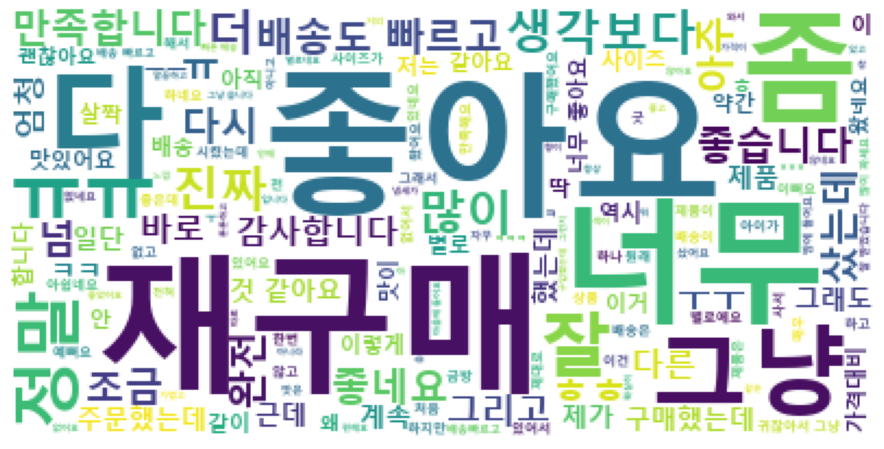

In [29]:
plt.figure(figsize=(20,8))
plt.imshow(cloud)
plt.axis('off')
plt.savefig("./naver_shopping_wordCloud.jpg") # 그림 저장
plt.show()

In [30]:
from gensim.models import Word2Vec

In [31]:
w2c = Word2Vec(window=5, # 중심단어를 기준으로 주변에 몇개 단어까지 관계성을 학습할 지
               min_count=5, # 전체 말뭉치의 최소 등장 빈도수 설정(최소빈도에 도달하지 못하면 학습단어로 사용x)
               sg=1, # 중심단어를 y, 주변단어를 x로 설정하는 알고리즘(skip=gram)
               vector_size=100, # 한개의 단어를 몇개의 숫자로 표현할 건지 숫자가 커질수록 각 단어의 관계를 풍부하게 표현가능
               sentences=tmp) # 학습할 데이터

In [32]:
w2c.wv.get_vector("좋아요")

array([-0.48995897,  0.58938354,  0.0421612 ,  0.09369527, -0.04771442,
       -0.5479794 , -0.21217255,  0.7600632 , -0.32868284, -0.538563  ,
        0.19417474, -0.41867584,  0.25274882,  0.14555344,  0.71863544,
       -0.22040135,  0.41425464, -0.4246455 , -0.1681695 , -0.07854526,
        0.15382689,  0.04089218,  0.45704985, -0.02142267,  0.0749571 ,
        0.07314551, -0.31841132, -0.04401991, -0.21248716, -0.15362872,
        0.26148075,  0.5747976 ,  0.20243987, -0.24046414,  0.24199693,
        0.5251335 ,  0.0782662 ,  0.22698416, -0.4190621 ,  0.14138855,
        0.30686674, -0.48060608,  0.13343297,  0.62098795,  0.14689085,
       -0.4487286 , -0.05113175,  0.06915849, -0.30939108,  0.50364816,
        0.62376595, -0.10136386, -0.29805598, -0.00119795, -0.42165008,
        0.57217586,  0.40710476,  0.03670057, -0.12199646,  0.28798303,
       -0.02644893,  0.6197631 ,  0.20673633,  0.21038075, -0.05583205,
        0.288695  ,  0.09974981,  0.3308522 , -0.11676091, -0.11

In [34]:
w2c.wv.most_similar("재구매")

[('구매인데', 0.7423909902572632),
 ('구매입니다.', 0.724812924861908),
 ('두번째', 0.7118523120880127),
 ('재주문', 0.7100925445556641),
 ('구매에요', 0.7039352655410767),
 ('구매입니다', 0.7012285590171814),
 ('주문인데', 0.695961594581604),
 ('이번이', 0.6946110129356384),
 ('구입인데', 0.69087153673172),
 ('세번째', 0.685401201248169)]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv_test = CountVectorizer()

In [91]:
train = pd.read_csv('./data/naver_shopping.txt', delimiter="\t", header=None)

In [92]:
train.shape

(200000, 2)

In [93]:
train.head()

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
train[0].replace(1, 0, inplace=True)

In [ ]:
train[0].replace(2, 0, inplace=True)

In [97]:
train[0].replace(5, 1, inplace=True)

In [96]:
train[0].replace(4, 1, inplace=True)

In [98]:
train[0].value_counts()

0    100037
1     99963
Name: 0, dtype: int64

In [99]:
train.head()

,0,1
0,1,배공빠르고 굿
1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,1,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.
3,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네...
4,1,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [69]:
from sklearn.model_selection import train_test_split

### 데이터셋 만들기

In [100]:
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=804,
                                                    test_size=0.3,
                                                   )

In [106]:
text_train = X_train[1]

In [111]:
text_test = X_test[1]

In [110]:
y_train

145527    1
116526    0
169784    0
179748    0
96649     1
         ..
131226    0
131732    1
34778     1
32448     0
157505    0
Name: 0, Length: 140000, dtype: int64

In [77]:
y_test

186867    1
94000     0
6669      0
47810     1
4284      1
         ..
20168     0
194955    0
161425    0
149178    1
171786    0
Name: 0, Length: 60000, dtype: int64

In [78]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140000, 1) (140000,)
(60000, 1) (60000,)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [89]:
text_train = pd.DataFrame(text_train, columns=['1'])

In [90]:
text_train

,1
145527,NaN
116526,NaN
169784,NaN
179748,NaN
96649,NaN
...,...
131226,NaN
131732,NaN
34778,NaN
32448,NaN


In [112]:
naver_shopping_cv = CountVectorizer()
naver_shopping_cv.fit(text_train)
X_train = naver_shopping_cv.transform(text_train) # 훈련용 데이터로 단어사전을 만들고 동일한 사전으로 test를 같이 해줘야 비교가된다.
# 따라서 test데이터는 따로 fit을 안시켜준다. 수치화작업에는 항상 train을 기준 똑같은 기준으로 정형화 해야한다.
X_test = naver_shopping_cv.transform(text_test)

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140000, 277583) (140000,)
(60000, 277583) (60000,)


In [115]:
logi_model = LogisticRegression()

In [116]:
rs = cross_val_score(logi_model, X_train, y_train, cv=3)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [117]:
rs

array([0.87779373, 0.87646517, 0.87586251])

In [118]:
logi_model.fit(X_train, y_train)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 네이버 쇼핑리뷰 회귀분석 예측 결과 테스트

In [120]:
sample_rivews = ["싸고 좋아요",
                 "재구매 의사 없습니다.",
                 "별로에요",
                 "또 구매 할게요",
                 "안사요!"]

sample_transform = naver_shopping_cv.transform(sample_rivews) # 정형화 작업
pre = logi_model.predict_proba(sample_transform) # 확률값 예측

In [121]:
# 예측결과 확인[부정평가일확률, 긍정평가일확률]
pre

array([[0.05048548, 0.94951452],
       [0.49210749, 0.50789251],
       [0.98633899, 0.01366101],
       [0.23036829, 0.76963171],
       [0.76247431, 0.23752569]])

In [122]:
naver_coef = logi_model.coef_[0]
len(naver_coef)# 각 단어별로 가중치가 학습된것을 확인할 수 있다

277583

In [124]:
naver_vocab = naver_shopping_cv.vocabulary_
naver_vocab # 딕셔너리형태, 정렬이 되어있지 않은 상태

{'얼리고나서가': 178958,
 '기대되네요': 39112,
 '마우스를': 83051,
 '보니까': 118086,
 '검은': 22951,
 '물체같은게': 100891,
 '찌꺼기인가': 235859,
 '암튼': 173711,
 '묻어있고': 99509,
 '안지워지네': 171137,
 '참ㅋㅋㅋ': 237859,
 '기분한번': 40005,
 '드릅다': 73652,
 '입었을': 203643,
 '너무': 51157,
 '부담스러워요': 120625,
 '사이즈를': 134276,
 '각각': 16524,
 '크게하면': 248432,
 '어떨지': 177249,
 '가격이': 13984,
 '저렴해고': 215048,
 '촉감도': 241436,
 '좋아요': 225504,
 '이뻐요': 198712,
 '작은': 207204,
 '사이즈가': 134099,
 '활용도가': 273918,
 '많을거': 85361,
 '같아서': 19109,
 '샀는데': 136723,
 '쇼파밑': 148182,
 '식탁밑': 154319,
 '침대러그로도': 244832,
 '사용되고': 132627,
 '부들부들': 120883,
 '촉감이': 241448,
 '배송은': 111914,
 '엄청': 179418,
 '빠르네요': 127975,
 '엄마선물했는데': 179309,
 '효과도': 274414,
 '좋았으면하네요': 226263,
 '자나아서너어아다시인': 205544,
 '나사': 46690,
 '한개구멍이': 265173,
 '불량이라': 123180,
 '안경쓴': 166624,
 '사람은': 131624,
 '뜹니다': 79551,
 '밀착이': 103312,
 '안돼서': 167546,
 '아쉽네요': 164287,
 '저렴하고': 214825,
 '쓰기': 160253,
 '집에': 233840,
 '모두': 94260,
 '교체해줫네요': 29919,
 '불량이왔어요': 123234,
 '2개구매해서': 3542,
 '여행자주다니는

In [125]:
len(naver_vocab)

277583

In [126]:
print(naver_coef[0]) # 사전에 등록된 0번 ~ 293365번 중 0번 단어에 대한 가중치
naver_vocab

-0.07459130493058971


{'얼리고나서가': 178958,
 '기대되네요': 39112,
 '마우스를': 83051,
 '보니까': 118086,
 '검은': 22951,
 '물체같은게': 100891,
 '찌꺼기인가': 235859,
 '암튼': 173711,
 '묻어있고': 99509,
 '안지워지네': 171137,
 '참ㅋㅋㅋ': 237859,
 '기분한번': 40005,
 '드릅다': 73652,
 '입었을': 203643,
 '너무': 51157,
 '부담스러워요': 120625,
 '사이즈를': 134276,
 '각각': 16524,
 '크게하면': 248432,
 '어떨지': 177249,
 '가격이': 13984,
 '저렴해고': 215048,
 '촉감도': 241436,
 '좋아요': 225504,
 '이뻐요': 198712,
 '작은': 207204,
 '사이즈가': 134099,
 '활용도가': 273918,
 '많을거': 85361,
 '같아서': 19109,
 '샀는데': 136723,
 '쇼파밑': 148182,
 '식탁밑': 154319,
 '침대러그로도': 244832,
 '사용되고': 132627,
 '부들부들': 120883,
 '촉감이': 241448,
 '배송은': 111914,
 '엄청': 179418,
 '빠르네요': 127975,
 '엄마선물했는데': 179309,
 '효과도': 274414,
 '좋았으면하네요': 226263,
 '자나아서너어아다시인': 205544,
 '나사': 46690,
 '한개구멍이': 265173,
 '불량이라': 123180,
 '안경쓴': 166624,
 '사람은': 131624,
 '뜹니다': 79551,
 '밀착이': 103312,
 '안돼서': 167546,
 '아쉽네요': 164287,
 '저렴하고': 214825,
 '쓰기': 160253,
 '집에': 233840,
 '모두': 94260,
 '교체해줫네요': 29919,
 '불량이왔어요': 123234,
 '2개구매해서': 3542,
 '여행자주다니는

In [128]:
# naver_vocab정렬작업 0번부터~
import pandas as pd
df = pd.DataFrame([naver_vocab.keys(), naver_vocab.values()],
                  index=["단어", "인덱스"]).T.sort_values(by="인덱스").set_index("인덱스")
df['가중치'] = naver_coef

C:\Users\AI\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [129]:
# 가중치를 중심으로 정렬 => 상위 30, 하위30개 단어 추출
df.sort_values(by="가중치", inplace=True, ascending=False)
top30 = df.head(30)
bottom30 = df.tail(30)

In [130]:
top30

,단어,가중치
인덱스,,
87753,맛있네요,3.104797
87900,맛있어요,2.916287
185058,예뻐요,2.769192
86975,맛나요,2.763837
241879,최고에요,2.687330
87868,맛있습니다,2.673740
225056,좋네여,2.663705
86762,맘에들어요,2.598229
65458,대만족입니다,2.585518


In [131]:
bottom30

,단어,가중치
인덱스,,
124089,불편합니다,-2.366783
175570,약해요,-2.378522
155958,실망스럽네요,-2.378648
167992,안됩니다,-2.421743
134702,사지마세요,-2.483916
57890,느리고,-2.504490
158316,싼게,-2.506436
170855,안좋네요,-2.508800
156008,실망이에요,-2.522456


### 네이버 쇼핑리뷰 시각화

<AxesSubplot:xlabel='단어'>

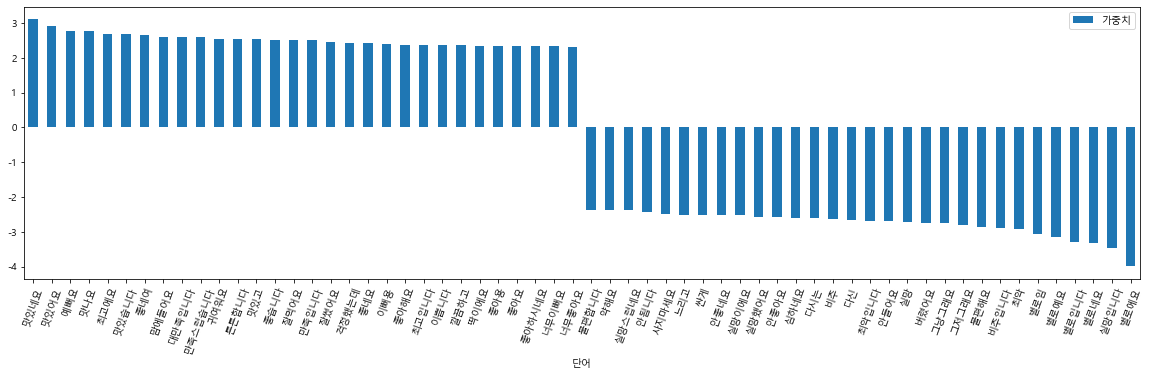

In [132]:
# 시각화 (긍부정 단어들의 가중치를 한 눈에 확인하는 시각화)
# 한글로 출력하기 위해서 폰트 지정하기!

from matplotlib import rc
rc('font', family = 'Malgun Gothic')

# 마이너스 나오게하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

main_words = pd.concat([top30, bottom30])
main_words.set_index("단어").plot(kind='bar', figsize=(20,5), rot=70)

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [134]:
from sklearn.pipeline import Pipeline

### 쇼핑리뷰 파이프라인 생성 및 그리드서치 

In [135]:
# 파이프라인 생성
pipline = Pipeline([
    ('shopping_tfidf', TfidfVectorizer()),
    ('shopping_logi', LogisticRegression())
    
])

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
grid_param = {
    "shopping_tfidf__max_df" : [4000, 9500, 15000], # 객체이름 뒤에 언더바 2개
    "shopping_tfidf__min_df" : [5, 8],
    "shopping_tfidf__ngram_range" : [(1,2), (2,2)],
    "shopping_logi__C" : [0.001, 0.01, 0.1, 10, 100, 1000]
}

In [138]:
X_train

<140000x277583 sparse matrix of type '<class 'numpy.int64'>'
	with 1119790 stored elements in Compressed Sparse Row format>

In [139]:
grid = GridSearchCV(pipline, grid_param, cv=3, n_jobs=-1)
grid.fit(text_train, y_train)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('shopping_tfidf', TfidfVectorizer()),
                                       ('shopping_logi',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'shopping_logi__C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'shopping_tfidf__max_df': [4000, 9500, 15000],
                         'shopping_tfidf__min_df': [5, 8],
                         'shopping_tfidf__ngram_range': [(1, 2), (2, 2)]})

In [140]:
rs.mean()

0.8767071368241108

In [141]:
# 결과확인
print("최고점수 : ", grid.best_score_)
print("최고조합 : ", grid.best_params_)

# 최적의 파라미터로 학습된 모델
best_model = grid.best_estimator_

# 단어사전 수
print(len(best_model.steps[0][1].vocabulary_))

최고점수 :  0.8685999934049121
최고조합 :  {'shopping_logi__C': 10, 'shopping_tfidf__max_df': 9500, 'shopping_tfidf__min_df': 5, 'shopping_tfidf__ngram_range': (1, 2)}
33233


In [142]:
from konlpy.tag import Kkma
from konlpy.tag import Okt

In [143]:
kkm = Kkma()
okt = Okt()

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 스팀 리뷰 분석

,label,review
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
5,1,역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^
6,1,재미있었습니다.
...,...,...
99989,1,꿀잼보장갬
99990,1,3 는?
99992,1,찌찌 배구
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


100%|████████████████████████████████████████████████████████████████████████████| 49996/49996 [10:11<00:00, 81.69it/s]


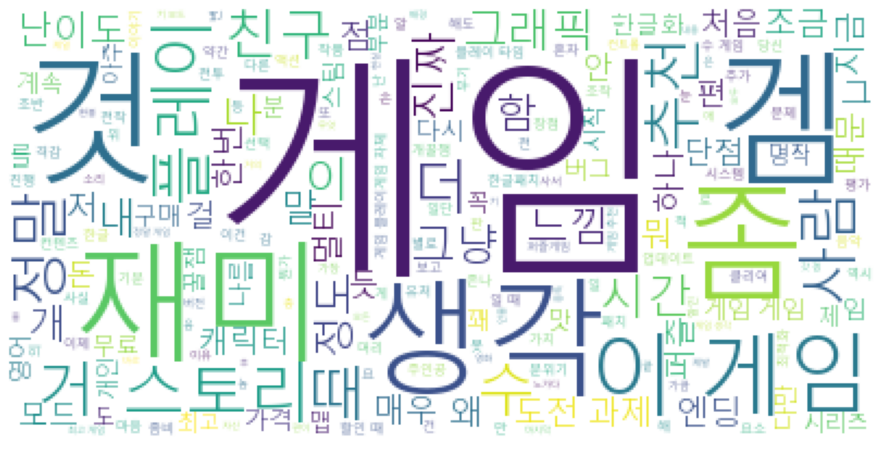

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
from tqdm import tqdm
# 스팀 리뷰파일 불러오기
steam_reviews = pd.read_csv("./data/steam.txt", delimiter="\t",
                           header=None)

# 스팀리뷰데이터 라벨과 특성 컬럼명 지어주기
steam_reviews.columns = ["label","review"]

# 스팀리뷰 긍정과 부정 각 변수에 불리언 인덱싱으로 넣어주기
steam_reviews_pos = steam_reviews[steam_reviews['label'] == 1]
steam_reviews_neg = steam_reviews[steam_reviews['label'] == 0]

# 형태소분석
okt = Okt()

# 스팀리뷰데이터 품사(명사)를 기준으로 토큰화하기
steam_pos_tokens = [ t for doc in tqdm(steam_reviews_pos['review']) for t in okt.nouns(doc)]

# 토큰으로 나눈 텍스트를 이용하여 워드클라우드 만들기
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_pos_tokens))
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축,y축 끄기
plt.show()

In [146]:
steam_reviews

,label,review
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


### 스팀리뷰 데이터셋 만들기

In [147]:
X = steam_reviews.iloc[:, 1:]
y = steam_reviews.iloc[:, 0]

In [148]:
X

,review
0,노래가 너무 적음
1,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...
99995,한글화해주면 10개산다
99996,개쌉노잼 ㅋㅋ
99997,노잼이네요... 30분하고 지웠어요...
99998,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [149]:
y

0        0
1        0
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    1
99999    1
Name: label, Length: 100000, dtype: int64

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=804,
                                                    test_size=0.3,
                                                   )

In [174]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70000, 1) (70000,)
(30000, 1) (30000,)


In [177]:
text_train2 = X_train['review']

In [178]:
text_test2 = X_test['review']

In [179]:
text_train2

5307                    아니 왜 테더가 작동 안해 1.0 정식이라며 https://steamcommunity.com/profiles/76561198029340437/home/
80441                                                                           눈이 빠질것 같은 집중력을 발휘하고 싶다면 해라..
7042                                  왜 FBI가 식칼이랑 소스통을 들고 과일을 부수고 다니는지 모르겠습니다... 7스테이지 진행중 격한 인생낭비감을 느껴서 포기.
56513                                                                          한붓그리기로 사람을 괴롭히는 방법 수백가지 시뮬레이터
54434                      부분부분 허술하다는 느낌이 드나, 아직 얼리엑세스이기도 하고, 그런 부분을 빼면 꽤 높은 완성도를 보여줘서 그저 아류작같은 평가를 받기엔 아깝다.
                                                        ...                                                 
154                                                                                              재밌다 팬심으로 한듯
660                                                                                            정말로 ㅈ같습니다 시벌것
34778    이거 스팀에서 무료배포할 때 다운받았는데 와씨ㅣ 진자 생각보다 더 무서움 이게 내가 쫄보라서 그런걸수도 있는데 그냥 ㄹㅇ 무서워ㅜㅜㅜㅜ 아니 브금 되게 귀에 거슬리게 소름끼...
32448              

In [180]:
text_test2

34703                                                         난잡하고 복잡하고 지루한 게임
89674                                                                 미친듯한 발적화
22907                                                                 입구컷 당함;;
24352                                                      이 게임을 하고 손목이 파괴됐어요!
43887    아시아 서버가 적습니다. 그러나 그거만 빼면 괜찮습니다. 구입을 추천할 수준은 아닙니다 딸려온다면 한 번쯤은 해볼 만한 게임
                                         ...                                  
37994           예쁘고 귀여운 게임. 체크포인트마저 냥이라서 귀여웠던 게임. 도트에 파스텔색 조합이 잘 맞는 그런 귀여운 게임.
62766                                                                  혼모노 투성이
54813                                                이미 일어난 일은 다시 되돌릴 수 없다는걸..
12036                                   위쳐의 첫번째 작품, 스토리를 이해하기 위해 플레이 해보려했지만 포기
71456                                                         샀는데 하루만에 할인하네 ;;
Name: review, Length: 30000, dtype: object

### 스팀 데이터 회귀분석


In [182]:
steam_cv = CountVectorizer()
steam_cv.fit(text_train2)
X_train2 = steam_cv.transform(text_train2) # 훈련용 데이터로 단어사전을 만들고 동일한 사전으로 test를 같이 해줘야 비교가된다.
# 따라서 test데이터는 따로 fit을 안시켜준다. 수치화작업에는 항상 train을 기준 똑같은 기준으로 정형화 해야한다.
X_test2 = steam_cv.transform(text_test2)

In [183]:
logi_model = LogisticRegression()

### 교차검증

In [185]:
rs = cross_val_score(logi_model, X_train2, y_train, cv=3)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [202]:
rs.mean()

0.7526285670419518

In [186]:
rs

array([0.75293563, 0.7540822 , 0.75086787])

In [187]:
logi_model.fit(X_train2, y_train)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 회귀결과테스트

In [188]:
sample_rivews = ["노잼",
                 "재밌어요",
                 "이딴 겜 안해",
                 "개꿀잼 입니다.",
                 "이 게임 왜 함"]

sample_transform = steam_cv.transform(sample_rivews) # 정형화 작업
pre = logi_model.predict_proba(sample_transform) # 확률값 예측

In [189]:
pre

array([[0.88042051, 0.11957949],
       [0.11256598, 0.88743402],
       [0.95018239, 0.04981761],
       [0.06254431, 0.93745569],
       [0.46864539, 0.53135461]])

### 스팀 가중치 시각화

In [190]:
steam_coef = logi_model.coef_[0]
len(steam_coef)# 각 단어별로 가중치가 학습된것을 확인할 수 있다

186633

In [191]:
steam_vocab = steam_cv.vocabulary_
steam_vocab # 딕셔너리형태, 정렬이 되어있지 않은 상태

{'아니': 106302,
 '테더가': 165592,
 '작동': 135199,
 '안해': 110629,
 '정식이라며': 142721,
 'https': 9793,
 'steamcommunity': 11880,
 'com': 8091,
 'profiles': 11087,
 '76561198029340437': 6589,
 'home': 9752,
 '눈이': 43340,
 '빠질것': 86303,
 '같은': 17467,
 '집중력을': 152686,
 '발휘하고': 76593,
 '싶다면': 103864,
 '해라': 179502,
 'fbi가': 9022,
 '식칼이랑': 101832,
 '소스통을': 95248,
 '들고': 54238,
 '과일을': 26817,
 '부수고': 82833,
 '다니는지': 44817,
 '모르겠습니다': 67925,
 '7스테이지': 6707,
 '진행중': 152161,
 '격한': 23408,
 '인생낭비감을': 131934,
 '느껴서': 43664,
 '포기': 170709,
 '한붓그리기로': 177556,
 '사람을': 88096,
 '괴롭히는': 27516,
 '방법': 76815,
 '수백가지': 96357,
 '시뮬레이터': 100631,
 '부분부분': 82735,
 '허술하다는': 181522,
 '느낌이': 43943,
 '드나': 53798,
 '아직': 107694,
 '얼리엑세스이기도': 115880,
 '하고': 174335,
 '그런': 30456,
 '부분을': 82755,
 '빼면': 86800,
 '높은': 42661,
 '완성도를': 122912,
 '보여줘서': 81324,
 '그저': 31219,
 '아류작같은': 106750,
 '평가를': 170330,
 '받기엔': 75795,
 '아깝다': 106162,
 '춫시리즈에': 159145,
 '타이베리안': 164491,
 '트와일라잇이': 167230,
 '있다면': 133841,
 '40k를': 4820,
 '대표하는'

In [192]:
len(steam_vocab)

186633

In [193]:
df = pd.DataFrame([steam_vocab.keys(), steam_vocab.values()],
                  index=["단어", "인덱스"]).T.sort_values(by="인덱스").set_index("인덱스")
df['가중치'] = steam_coef

C:\Users\AI\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [194]:
df.sort_values(by="가중치", inplace=True, ascending=False)
top30 = df.head(30)
bottom30 = df.tail(30)

<AxesSubplot:xlabel='단어'>

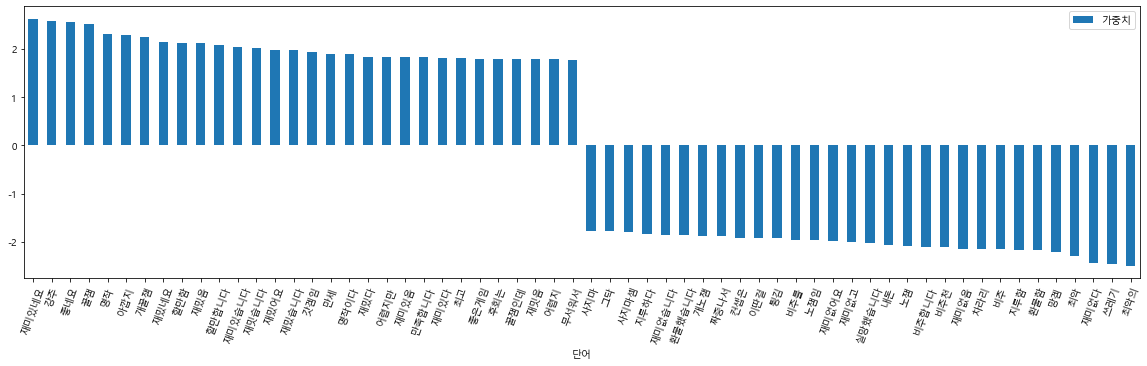

In [195]:
# 시각화 (긍부정 단어들의 가중치를 한 눈에 확인하는 시각화)
# 한글로 출력하기 위해서 폰트 지정하기!

from matplotlib import rc
rc('font', family = 'Malgun Gothic')

# 마이너스 나오게하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

main_words = pd.concat([top30, bottom30])
main_words.set_index("단어").plot(kind='bar', figsize=(20,5), rot=70)

### 스팀 파이프라인 생성 및 그리드서치

In [196]:
# 파이프라인 생성
pipline = Pipeline([
    ('steam_tfidf', TfidfVectorizer()),
    ('steam_logi', LogisticRegression())
    
])

In [197]:
grid_param = {
    "steam_tfidf__max_df" : [3000, 4500, 10000], # 객체이름 뒤에 언더바 2개
    "steam_tfidf__min_df" : [3, 5, 8],
    "steam_tfidf__ngram_range" : [(1,2), (2,2)],
    "steam_logi__C" : [0.001, 0.01, 0.1, 10, 100, 1000]
}

In [198]:
grid = GridSearchCV(pipline, grid_param, cv=3, n_jobs=-1)
grid.fit(text_train2, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('steam_tfidf', TfidfVectorizer()),
                                       ('steam_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'steam_logi__C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'steam_tfidf__max_df': [3000, 4500, 10000],
                         'steam_tfidf__min_df': [3, 5, 8],
                         'steam_tfidf__ngram_range': [(1, 2), (2, 2)]})

In [199]:
rs.mean()

0.7526285670419518

In [200]:
# 결과확인
print("최고점수 : ", grid.best_score_)
print("최고조합 : ", grid.best_params_)

# 최적의 파라미터로 학습된 모델
best_model = grid.best_estimator_

# 단어사전 수
print(len(best_model.steps[0][1].vocabulary_))

최고점수 :  0.7400285768325876
최고조합 :  {'steam_logi__C': 0.1, 'steam_tfidf__max_df': 3000, 'steam_tfidf__min_df': 3, 'steam_tfidf__ngram_range': (1, 2)}
42270
